# Housing Price Prediction Analysis

This notebook analyzes housing price data using various machine learning models and provides visualizations of the results.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## 1. Data Loading and Initial Exploration

In [4]:
# Load the dataset
data = pd.read_csv('HousingDataCategorical.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
display(data.head())

print("\nDataset Info:")
display(data.info())

print("\nNumerical Columns Summary:")
display(data.describe())

First few rows of the dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,Classic,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,Old,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,Classic,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,Classic,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,Classic,6.0622,3,222,18.7,396.90,NaN,36.2



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    object 
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


None


Numerical Columns Summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 2. Data Visualization

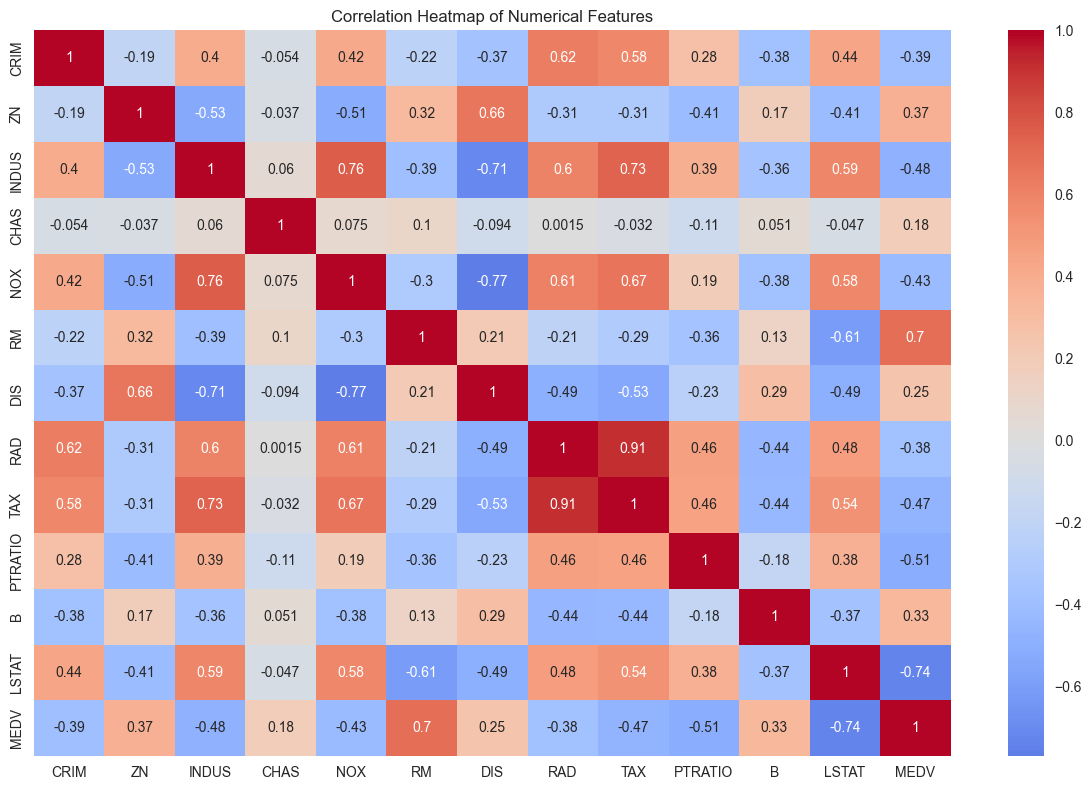

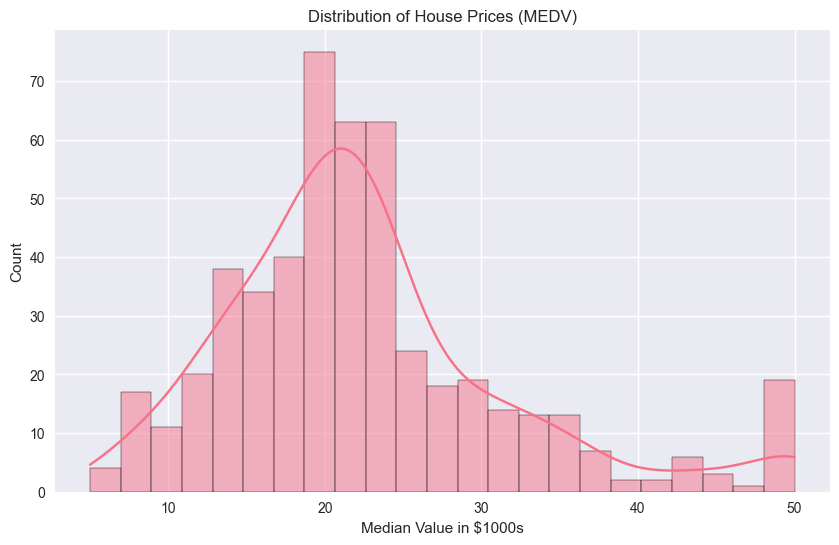

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Distribution of target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value in $1000s')
plt.ylabel('Count')
plt.show()

## 3. Data Cleaning and Preprocessing

In [6]:
def clean_data(df):
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Handle missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    
    # For numeric columns, fill NA with median
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())
    
    # For categorical columns, fill NA with mode
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # Encode categorical variables
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
    
    return df

# Clean the data
cleaned_data = clean_data(data)

print("Missing values after cleaning:")
display(cleaned_data.isnull().sum())

Missing values after cleaning:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 4. Model Training and Evaluation

In [7]:
def train_and_evaluate_models(df):
    # Separate features and target
    X = df.drop('MEDV', axis=1)
    y = df['MEDV']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }
    
    results = {}
    predictions = {}
    
    for name, model in models.items():
        # Train
        model.fit(X_train_scaled, y_train)
        
        # Predict
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        # Store predictions
        predictions[name] = {
            'y_test': y_test,
            'y_pred': test_pred
        }
        
        # Evaluate
        results[name] = {
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred))
        }
    
    return results, predictions

# Train models and get results
results, predictions = train_and_evaluate_models(cleaned_data)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

,train_r2,test_r2,train_rmse,test_rmse
Linear Regression,0.741603,0.664150,4.737918,4.962779
Decision Tree,1.000000,0.624695,0.000000,5.246194
Random Forest,0.973199,0.887815,1.525868,2.868266


## 5. Model Performance Visualization

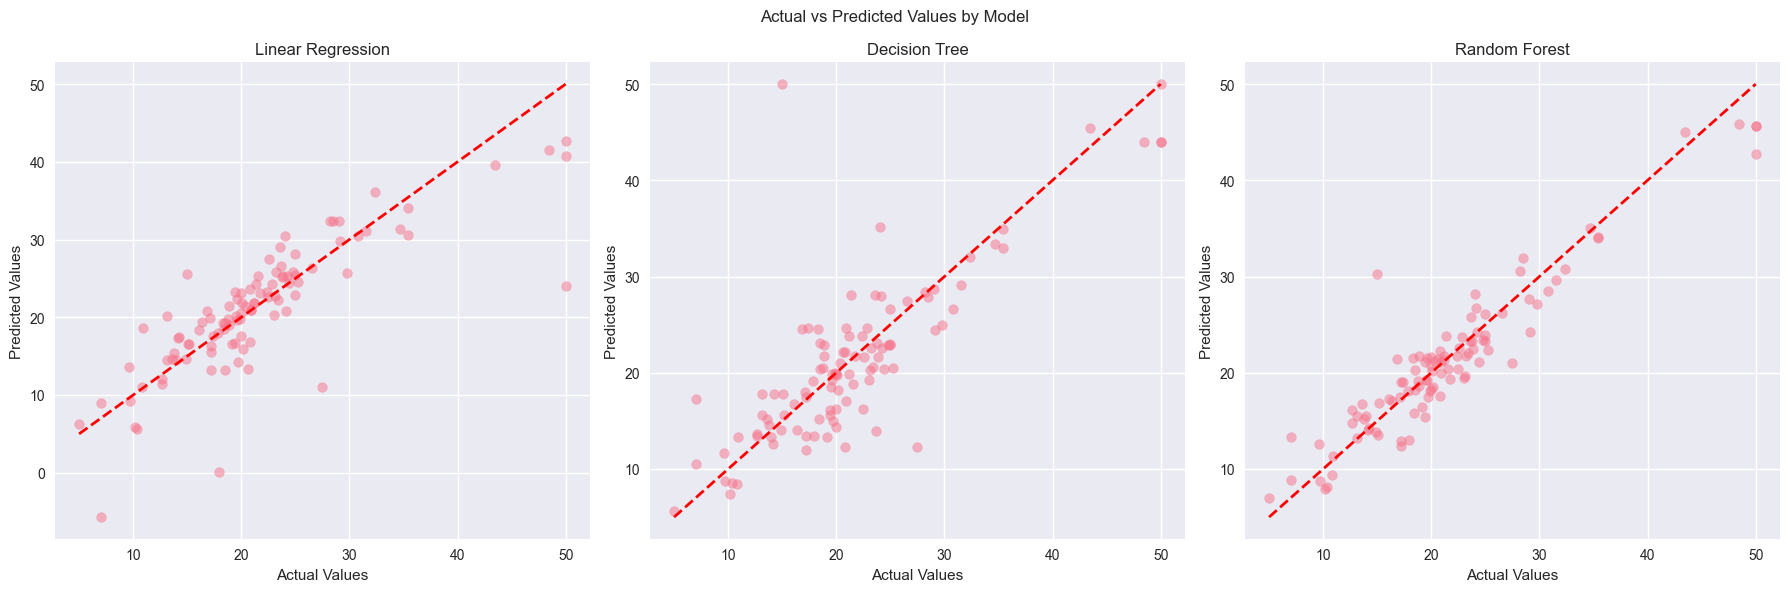

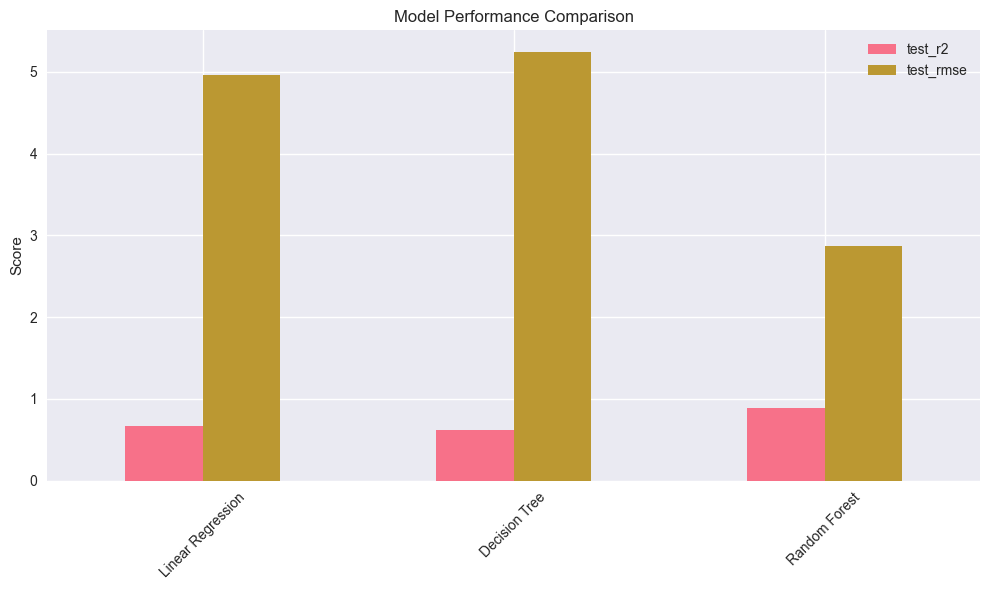

In [8]:
# Plot actual vs predicted values for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Actual vs Predicted Values by Model')

for (name, pred), ax in zip(predictions.items(), axes):
    ax.scatter(pred['y_test'], pred['y_pred'], alpha=0.5)
    ax.plot([pred['y_test'].min(), pred['y_test'].max()], 
            [pred['y_test'].min(), pred['y_test'].max()], 
            'r--', lw=2)
    ax.set_title(name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Plot model performance metrics
metrics_df = results_df[['test_r2', 'test_rmse']]
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()